In [100]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

Fake = pd.read_csv("/content/drive/MyDrive/CSE366/Fake.csv", encoding='latin-1')
True_df = pd.read_csv("/content/drive/MyDrive/CSE366/True.csv", encoding='latin-1')


/tmp/ipython-input-1689774486.py:3: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  Fake = pd.read_csv("/content/drive/MyDrive/CSE366/Fake.csv", encoding='latin-1')


In [ ]:
Fake['label'] = 0
True_df['label'] = 1

df = pd.concat([Fake, True_df], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44917 entries, 0 to 44916
Columns: 130 entries, title to label
dtypes: int64(1), object(129)
memory usage: 44.5+ MB


In [ ]:
news_list = df['text'].tolist()


In [ ]:
for i, article in enumerate(news_list[:5], 1):
    print(f"Article {i}: {article[:200]}...")  # show first 200 chars


Article 1: Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former rea...
Article 2: House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investig...
Article 3: On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In Jan...
Article 4: On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack ...
Article 5: Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentioning his name. The Pope delivered hi

In [ ]:
# Convert the 'text' column to a list
news_list = df['text'].tolist()

# Check the first 5 articles
for i, article in enumerate(news_list[:5], 1):
    print(f"Article {i}: {article[:200]}...")  # shows first 200 characters


Article 1: Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former rea...
Article 2: House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investig...
Article 3: On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In Jan...
Article 4: On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack ...
Article 5: Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentioning his name. The Pope delivered hi

In [ ]:
# Convert to a Python list, truncating each article for readability
news_list = [str(article)[:200] + "..." if len(str(article)) > 200 else str(article) for article in df['text'].tolist()]

# Preview first 5 articles
for i, article in enumerate(news_list[:5], 1):
    print(f"Article {i}: {article}\n")

Article 1: Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former rea...

Article 2: House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investig...

Article 3: On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In Jan...

Article 4: On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack ...

Article 5: Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentioning his name. The Pope delivere

In [ ]:
# Fake news (label = 0)
fake_news_list = df[df['label'] == 0]['text'].tolist()

# Real news (label = 1)
real_news_list = df[df['label'] == 1]['text'].tolist()


In [ ]:
# Limit to first 200 characters + "..." if longer
fake_news_list_short = [str(text)[:200] + "..." if len(str(text)) > 200 else str(text) for text in fake_news_list]
real_news_list_short = [str(text)[:200] + "..." if len(str(text)) > 200 else str(text) for text in real_news_list]

In [ ]:
print("Fake news examples:")
for i, text in enumerate(fake_news_list_short[:5], 1):
    print(f"{i}: {text}\n")

print("Real news examples:")
for i, text in enumerate(real_news_list_short[:5], 1):
    print(f"{i}: {text}\n")


Fake news examples:
1: Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former rea...

2: House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investig...

3: On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In Jan...

4: On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack ...

5: Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentioning his name. The Pope delivered his message just d

In [ ]:
news_list_with_titles = (df['title'] + " " + df['text']).tolist()


cleaning

In [ ]:
import pandas as pd
import numpy as np

# =========================
# CONFIG
# =========================
TEXT_COL = 'text'
LABEL_COL = 'label'

# =========================
# 1. EMPTY ARTICLES
# =========================
empty_null = df[TEXT_COL].isnull().sum()
empty_blank = (df[TEXT_COL].astype(str).str.strip() == '').sum()

# =========================
# 2. DUPLICATES
# =========================
dup_all = df.duplicated().sum()
dup_text = df.duplicated(subset=[TEXT_COL]).sum()

# =========================
# 3. ARTICLE LENGTH
# =========================
df['char_len'] = df[TEXT_COL].astype(str).str.len()
df['word_len'] = df[TEXT_COL].astype(str).str.split().str.len()

short_articles = (df['word_len'] < 30).sum()
long_articles = (df['word_len'] > 5000).sum()

# =========================
# 4. URL CHECK
# =========================
has_url = df[TEXT_COL].str.contains(r'http|https|www\.', case=False, na=False)
url_count = has_url.sum()

# =========================
# 5. HTML TAG CHECK
# =========================
has_html = df[TEXT_COL].str.contains(r'<.*?>', na=False)
html_count = has_html.sum()

# =========================
# 6. EXTRA SPACE CHECK
# =========================
extra_spaces = df[TEXT_COL].str.contains(r'\s{2,}', na=False)
extra_space_count = extra_spaces.sum()

# =========================
# 7. UPPERCASE RATIO
# =========================
def upper_ratio(text):
    letters = [c for c in text if c.isalpha()]
    return sum(c.isupper() for c in letters) / len(letters) if letters else 0

df['upper_ratio'] = df[TEXT_COL].astype(str).apply(upper_ratio)
high_uppercase = (df['upper_ratio'] > 0.4).sum()

# =========================
# 8. LANGUAGE CHECK (Non-English chars)
# =========================
non_english = df[TEXT_COL].str.contains(r'[^\x00-\x7F]', na=False)
non_english_count = non_english.sum()

# =========================
# 9. LABEL CHECK
# =========================
label_distribution = df[LABEL_COL].value_counts()
unique_labels = df[LABEL_COL].unique()

# =========================
# 10. DATA LEAKAGE CHECK
# =========================
leakage_cols = {'source', 'rating', 'truth_score', 'fact_check'}
found_leakage = leakage_cols.intersection(set(df.columns))

# =========================
# FINAL REPORT
# =========================
print("\n" + "="*45)
print("🧪 DATA CLEANLINESS REPORT")
print("="*45)

print(f"🟥 Empty (NULL) articles: {empty_null}")
print(f"🟥 Empty (BLANK) articles: {empty_blank}")

print(f"\n🟧 Duplicate rows (all): {dup_all}")
print(f"🟧 Duplicate articles (text): {dup_text}")

print(f"\n🟨 Short articles (<30 words): {short_articles}")
print(f"🟨 Long articles (>5000 words): {long_articles}")

print(f"\n🟦 Articles with URLs: {url_count}")
print(f"🟦 Articles with HTML tags: {html_count}")
print(f"🟦 Articles with extra spaces: {extra_space_count}")

print(f"\n🟪 High uppercase articles (>40%): {high_uppercase}")
print(f"🟪 Non-English articles: {non_english_count}")

print("\n🟩 Label distribution:")
print(label_distribution)
print(f"🟩 Unique labels: {unique_labels}")

print(f"\n🟥 Possible leakage columns found: {found_leakage if found_leakage else 'None'}")

print("\n✅ CLEAN DATA CRITERIA")
print("✔ Empty articles = 0")
print("✔ Duplicates = 0")
print("✔ Reasonable length")
print("✔ No URLs / HTML")
print("✔ Low uppercase noise")
print("✔ One language")
print("✔ Correct labels")
print("✔ No leakage")

print("="*45)




🧪 DATA CLEANLINESS REPORT
🟥 Empty (NULL) articles: 632
🟥 Empty (BLANK) articles: 1

🟧 Duplicate rows (all): 218
🟧 Duplicate articles (text): 6263

🟨 Short articles (<30 words): 1516
🟨 Long articles (>5000 words): 20

🟦 Articles with URLs: 3403
🟦 Articles with HTML tags: 87
🟦 Articles with extra spaces: 41296

🟪 High uppercase articles (>40%): 91
🟪 Non-English articles: 1158

🟩 Label distribution:
label
0    23500
1    21417
Name: count, dtype: int64
🟩 Unique labels: [0 1]

🟥 Possible leakage columns found: None

✅ CLEAN DATA CRITERIA
✔ Empty articles = 0
✔ Duplicates = 0
✔ Reasonable length
✔ No URLs / HTML
✔ Low uppercase noise
✔ One language
✔ Correct labels
✔ No leakage


In [101]:
import pandas as pd
import re

# =========================
# CONFIG
# =========================
TEXT_COL = 'text'
LABEL_COL = 'label'

# =========================
# 1. Drop duplicate articles
# =========================
df = df.drop_duplicates(subset=[TEXT_COL]).reset_index(drop=True)

# =========================
# 2. Remove very short / very long articles
# =========================
df['word_len'] = df[TEXT_COL].astype(str).str.split().str.len()
df = df[(df['word_len'] >= 30) & (df['word_len'] <= 5000)].reset_index(drop=True)

# =========================
# 3. Remove URLs
# =========================
df[TEXT_COL] = df[TEXT_COL].astype(str).str.replace(r'http\S+|www\S+', '', regex=True)

# =========================
# 4. Remove extra spaces
# =========================
df[TEXT_COL] = df[TEXT_COL].str.replace(r'\s+', ' ', regex=True).str.strip()

# =========================
# 5. Convert all text to lowercase
# =========================
df[TEXT_COL] = df[TEXT_COL].str.lower()

# =========================
# 6. Optional: Remove remaining empty rows after cleaning
# =========================
df = df[df[TEXT_COL].str.strip() != ''].reset_index(drop=True)

# =========================
# 7. Verify cleaning
# =========================
print("✅ Cleaning completed")
print(f"Total articles after cleaning: {len(df)}")
print(f"Duplicate articles: {df.duplicated(subset=[TEXT_COL]).sum()}")
print(f"Articles <30 words: {(df[TEXT_COL].str.split().str.len() < 30).sum()}")
print(f"Articles >5000 words: {(df[TEXT_COL].str.split().str.len() > 5000).sum()}")
print(f"Articles with URLs: {df[TEXT_COL].str.contains(r'http|www\.', regex=True).sum()}")


✅ Cleaning completed
Total articles after cleaning: 38001
Duplicate articles: 22
Articles <30 words: 1
Articles >5000 words: 0
Articles with URLs: 4


In [102]:
def data_quality_report(df):
    return {
        "rows": df.shape[0],
        "columns": df.shape[1],
        "missing_values": df.isnull().sum().to_dict(),
        "duplicates": df.duplicated().sum(),
        "label_distribution": df['label'].value_counts().to_dict()
    }

data_quality_report(df)


{'rows': 38001,
 'columns': 133,
 'missing_values': {'title': 0,
  'text': 0,
  'subject': 2,
  'date': 2,
  'Unnamed: 4': 37997,
  'Unnamed: 5': 37997,
  'Unnamed: 6': 37997,
  'Unnamed: 7': 37997,
  'Unnamed: 8': 37998,
  'Unnamed: 9': 37998,
  'Unnamed: 10': 37998,
  'Unnamed: 11': 37998,
  'Unnamed: 12': 37998,
  'Unnamed: 13': 37998,
  'Unnamed: 14': 37998,
  'Unnamed: 15': 37998,
  'Unnamed: 16': 37998,
  'Unnamed: 17': 37998,
  'Unnamed: 18': 37998,
  'Unnamed: 19': 37998,
  'Unnamed: 20': 37998,
  'Unnamed: 21': 37998,
  'Unnamed: 22': 37999,
  'Unnamed: 23': 37999,
  'Unnamed: 24': 37999,
  'Unnamed: 25': 37999,
  'Unnamed: 26': 37999,
  'Unnamed: 27': 37999,
  'Unnamed: 28': 37999,
  'Unnamed: 29': 37999,
  'Unnamed: 30': 37999,
  'Unnamed: 31': 37999,
  'Unnamed: 32': 37999,
  'Unnamed: 33': 37999,
  'Unnamed: 34': 37999,
  'Unnamed: 35': 38000,
  'Unnamed: 36': 38000,
  'Unnamed: 37': 38000,
  'Unnamed: 38': 38000,
  'Unnamed: 39': 38000,
  'Unnamed: 40': 38000,
  'Unnamed:

In [103]:
print("Shape of cleaned dataset:", df.shape)

Shape of cleaned dataset: (38001, 133)


In [107]:
print(df.head())

                                               title  \
0  Donald Trump Sends Out Embarrassing New Yearâ...   
1  Drunk Bragging Trump Staffer Started Russian C...   
2  Sheriff David Clarke Becomes An Internet Joke ...   
3  Trump Is So Obsessed He Even Has Obamaâs Nam...   
4  Pope Francis Just Called Out Donald Trump Duri...   

                                                text subject       date  \
0  donald trump just couldn t wish all americans ...    News  31-Dec-17   
1  house intelligence committee chairman devin nu...    News  31-Dec-17   
2  on friday, it was revealed that former milwauk...    News  30-Dec-17   
3  on christmas day, donald trump announced that ...    News  29-Dec-17   
4  pope francis used his annual christmas day mes...    News  25-Dec-17   

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ...  \
0        NaN        NaN        NaN        NaN        NaN        NaN  ...   
1        NaN        NaN        NaN        NaN        NaN    

In [108]:
df['text_length'] = df['text'].str.len()
print(df['text_length'].describe())

count    38001.000000
mean      2467.009368
std       1791.720823
min        146.000000
25%       1374.000000
50%       2235.000000
75%       3098.000000
max      32578.000000
Name: text_length, dtype: float64


In [109]:
print("Remaining URLs:", df['text'].str.contains(r'http\S+|www.\S+', regex=True).sum())
print("Remaining special characters:", df['text'].str.contains(r'[^a-zA-Z0-9\s]').sum())

Remaining URLs: 6
Remaining special characters: 37999


In [110]:
print("Label distribution:\n", df['label'].value_counts())

Label distribution:
 label
1    21166
0    16835
Name: count, dtype: int64


In [111]:
df.info()
df.head()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38001 entries, 0 to 38000
Columns: 134 entries, title to text_length
dtypes: float64(1), int64(4), object(129)
memory usage: 38.9+ MB


Index(['title', 'text', 'subject', 'date', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 124', 'Unnamed: 125', 'Unnamed: 126', 'Unnamed: 127',
       'Unnamed: 128', 'label', 'char_len', 'word_len', 'upper_ratio',
       'text_length'],
      dtype='object', length=134)

splite


In [112]:
from sklearn.model_selection import train_test_split

# Features (text) and labels
X = df['text']      # Input texts
y = df['label']     # Labels: 0 = Fake, 1 = True

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Optional: Check label distribution
print("\nTraining label distribution:\n", y_train.value_counts())
print("\nTesting label distribution:\n", y_test.value_counts())


X_train shape: (30400,)
X_test shape: (7601,)
y_train shape: (30400,)
y_test shape: (7601,)

Training label distribution:
 label
1    16932
0    13468
Name: count, dtype: int64

Testing label distribution:
 label
1    4234
0    3367
Name: count, dtype: int64


TF-IDF

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)




Model

In [114]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [115]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9828969872385213

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3367
           1       0.98      0.99      0.98      4234

    accuracy                           0.98      7601
   macro avg       0.98      0.98      0.98      7601
weighted avg       0.98      0.98      0.98      7601


Confusion Matrix:
 [[3260  107]
 [  23 4211]]


Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import display

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

y_pred_rf = rf_model.predict(X_test_tfidf)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
display(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
display(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.9963162741744507

Classification Report:


'              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00      3367\n           1       1.00      1.00      1.00      4234\n\n    accuracy                           1.00      7601\n   macro avg       1.00      1.00      1.00      7601\nweighted avg       1.00      1.00      1.00      7601\n'


Confusion Matrix:


array([[3347,   20],
       [   8, 4226]])

In [117]:
pip install matplotlib


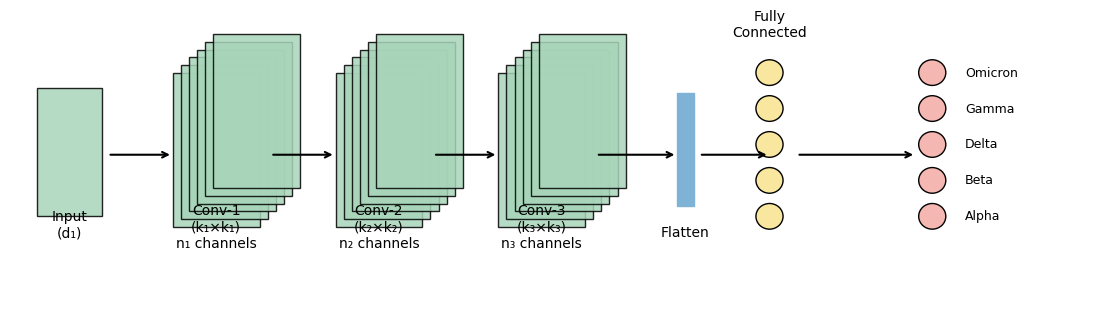

In [118]:
#CNN diagram
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_block(ax, xy, width, height, depth=5, label="", color="#A8D5BA"):
    """Draw stacked CNN feature maps"""
    x, y = xy
    for i in range(depth):
        rect = patches.Rectangle(
            (x + i*0.15, y + i*0.15),
            width, height,
            linewidth=1,
            edgecolor='black',
            facecolor=color,
            alpha=0.85
        )
        ax.add_patch(rect)
    ax.text(x + width/2, y - 0.4, label, ha='center', fontsize=10)

def draw_arrow(ax, start, end):
    ax.annotate(
        "", xy=end, xytext=start,
        arrowprops=dict(arrowstyle="->", linewidth=1.5)
    )

# Create figure
fig, ax = plt.subplots(figsize=(14, 4))
ax.set_xlim(0, 20)
ax.set_ylim(0, 6)
ax.axis('off')

# Input
draw_block(ax, (0.5, 2), 1.2, 2.5, depth=1, label="Input\n(d₁)")

# Conv Layer 1
draw_block(ax, (3, 1.8), 1.6, 3, depth=6, label="Conv-1\n(k₁×k₁)\nn₁ channels")

# Conv Layer 2
draw_block(ax, (6, 1.8), 1.6, 3, depth=6, label="Conv-2\n(k₂×k₂)\nn₂ channels")

# Conv Layer 3
draw_block(ax, (9, 1.8), 1.6, 3, depth=6, label="Conv-3\n(k₃×k₃)\nn₃ channels")

# Flatten
flatten = patches.Rectangle((12.3, 2.2), 0.3, 2.2, color="#7FB3D5")
ax.add_patch(flatten)
ax.text(12.45, 1.6, "Flatten", ha='center', fontsize=10)

# Fully Connected
fc_x = 14
for i in range(5):
    circ = plt.Circle((fc_x, 2 + i*0.7), 0.25, color="#F9E79F", ec="black")
    ax.add_patch(circ)

ax.text(fc_x, 5.5, "Fully\nConnected", ha='center', fontsize=10)

# Output
for i, label in enumerate(["Alpha", "Beta", "Delta", "Gamma", "Omicron"]):
    circ = plt.Circle((17, 2 + i*0.7), 0.25, color="#F5B7B1", ec="black")
    ax.add_patch(circ)
    ax.text(17.6, 2 + i*0.7, label, fontsize=9, va='center')

# Arrows
draw_arrow(ax, (1.8, 3.2), (3, 3.2))
draw_arrow(ax, (4.8, 3.2), (6, 3.2))
draw_arrow(ax, (7.8, 3.2), (9, 3.2))
draw_arrow(ax, (10.8, 3.2), (12.3, 3.2))
draw_arrow(ax, (12.7, 3.2), (14, 3.2))
draw_arrow(ax, (14.5, 3.2), (16.7, 3.2))

plt.show()


NAIVE BEYS

In [119]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred_nb = nb_model.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.931587948954085


In [120]:
import pickle

# Save trained Logistic Regression model
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Logistic Regression model saved as 'logistic_model.pkl'")


Logistic Regression model saved as 'logistic_model.pkl'


In [121]:
import pickle

# Save TF-IDF vectorizer correctly
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)


In [122]:
with open("tfidf_vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)


In [123]:
import re

def predict_fake_news(text):
    # Clean text
    text_clean = re.sub(r'http\S+|www.\S+', '', text)
    text_clean = re.sub(r'[^a-zA-Z0-9\s]', '', text_clean)
    text_clean = re.sub(r'\s+', ' ', text_clean).strip()

    # Convert to TF-IDF vector
    text_vector = tfidf_vectorizer.transform([text_clean])

    # Predict using Logistic Regression
    pred = model.predict(text_vector)[0]

    return "Fake" if pred == 0 else "Real"


In [124]:
# Single news prediction
sample_text = "Breaking news: Scientists discover a cure for cancer!"
print("Prediction:", predict_fake_news(sample_text))

# Multiple news articles
news_list = [
    "Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that Instead he had to give a shout out to his enemies haters and the very dishonest fake news media The former reality s...",
    "house intelligence committee chairman devin nu..."
]

for news in news_list:
    print("News:", news)
    print("Prediction:", predict_fake_news(news))
    print("---")


Prediction: Fake
News: Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that Instead he had to give a shout out to his enemies haters and the very dishonest fake news media The former reality s...
Prediction: Fake
---
News: house intelligence committee chairman devin nu...
Prediction: Real
---


In [125]:
import joblib

# Save model and vectorizer
joblib.dump(model, "fake_news_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

# Later you can load them with:
# model = joblib.load("fake_news_model.pkl")
# tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

streamlite

In [126]:
pip install streamlit


In [127]:
import streamlit as st
import pickle
import re
import joblib # Import joblib

# -----------------------------
# Load your trained model & vectorizer
# -----------------------------
# Use joblib.load for files saved with joblib.dump
model = joblib.load("logistic_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# -----------------------------
# Text cleaning function
# -----------------------------
def clean_text(text):
    text = str(text)
    text = re.sub(r'http\S+|www.\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# -----------------------------
# Prediction function
# -----------------------------
def predict_fake_news(text):
    text_clean = clean_text(text)
    vector = vectorizer.transform([text_clean])
    pred = model.predict(vector)[0]
    return "Real News" if pred==1 else "Fake News"

# -----------------------------
# Streamlit UI
# -----------------------------
st.title("Fake News Detection")
st.write("Enter a news article below to check if it is Fake or Real.")

user_input = st.text_area("Paste your news article here:")

if st.button("Predict"):
    if user_input.strip() != "":
        result = predict_fake_news(user_input)
        st.success(f"Prediction: {result}")
    else:
        st.warning("Please enter some text!")


2025-12-17 16:43:59.002 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 16:43:59.003 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 16:43:59.004 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 16:43:59.005 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 16:43:59.006 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 16:43:59.007 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 16:43:59.008 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 16:43:59.009 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [128]:
!ls


app.py			 fake_news_model.pkl  rf_model.pkl
cnn_fake_news_model.png  logistic_model.pkl   sample_data
drive			 nb_model.pkl	      tfidf_vectorizer.pkl


In [129]:
app_code = """
import streamlit as st
import pickle
import re

# Load model & vectorizer
with open("logistic_model.pkl", "rb") as f:
    model = pickle.load(f)
with open("tfidf_vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

# Text cleaning function
def clean_text(text):
    text = str(text)
    text = re.sub(r'http\\S+|www.\\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\\s]', '', text)
    text = re.sub(r'\\s+', ' ', text).strip()
    return text

# Prediction function
def predict_fake_news(text):
    text_clean = clean_text(text)
    vector = vectorizer.transform([text_clean])
    pred = model.predict(vector)[0]
    return "Real News" if pred==1 else "Fake News"

# Streamlit UI
st.title("Fake News Detection")
st.write("Enter a news article below to check if it is Fake or Real.")
user_input = st.text_area("Paste your news article here:")

if st.button("Predict"):
    if user_input.strip() != "":
        result = predict_fake_news(user_input)
        st.success(f"Prediction: {result}")
    else:
        st.warning("Please enter some text!")
"""

with open("app.py", "w") as f:
    f.write(app_code)

print("app.py created successfully ✅")


app.py created successfully ✅


In [130]:
!ls


app.py			 fake_news_model.pkl  rf_model.pkl
cnn_fake_news_model.png  logistic_model.pkl   sample_data
drive			 nb_model.pkl	      tfidf_vectorizer.pkl


In [131]:
import pickle

# Save Naive Bayes
with open('nb_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)

# Save Random Forest
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


In [132]:
from google.colab import files

files.download('nb_model.pkl')
files.download('rf_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Task
Here's an explanation of each component shown in the Convolutional Neural Network (CNN) architecture diagram:

*   **Input (d₁)**: This represents the raw input data to the CNN. For image data, this would be the pixels of an image, typically a 2D or 3D array (height x width x color channels). For text data, this could be a sequence of word embeddings. The `d₁` often refers to the dimensions of this input.

*   **Embedding Layer**: While not explicitly labeled as a separate block in this diagram, in the context of text classification (like fake news detection), the input `d₁` would often first pass through an Embedding Layer. This layer converts sparse categorical input (like words or tokens) into dense, lower-dimensional vector representations (embeddings). These embeddings capture semantic relationships between words, which is crucial for NLP tasks.

*   **Convolutional Layers (Conv-1, Conv-2, Conv-3)**: These are the core building blocks of a CNN.
    *   **Filters/Kernels (k₁×k₁, k₂×k₂, k₃×k₃)**: Each convolutional layer applies a set of learnable filters (also called kernels) of a specified size (e.g., k₁x k₁) to the input. These filters slide across the input data, performing a dot product with the local region they cover. This operation extracts features like edges, textures, or specific patterns. In the context of text, these filters detect n-grams (sequences of words) or patterns in word embeddings.
    *   **Channels (n₁, n₂, n₃)**: Each filter generates one feature map. The `n₁, n₂, n₃` indicate the number of such feature maps (or channels) in each convolutional layer. More channels mean the layer can learn to detect a greater variety of features. As data passes through successive convolutional layers, the network learns increasingly complex and abstract features.

*   **Pooling Layers (often implied after Conv layers)**: Although not explicitly shown as separate blocks, pooling layers (like Max Pooling or Average Pooling) are typically interleaved between convolutional layers. Their purpose is to reduce the dimensionality of the feature maps, which helps to:
    *   Reduce the number of parameters and computation in the network.
    *   Control overfitting.
    *   Make the learned features more robust to small shifts or distortions in the input (translation invariance).

*   **Flatten**: After several convolutional and pooling layers, the high-dimensional feature maps are flattened into a single, long vector. This transformation is necessary to connect the convolutional part of the network to the fully connected layers that follow.

*   **Fully Connected Layers (Dense Layers)**: These are standard neural network layers where every neuron in one layer is connected to every neuron in the next layer.
    *   They take the flattened feature vector as input.
    *   They learn non-linear combinations of the high-level features extracted by the convolutional layers.
    *   These layers are responsible for learning the final classifications based on the features. The diagram shows multiple neurons in this section, indicating the network's ability to learn complex relationships from the features.

*   **Output**: The final layer of the network, which produces the model's prediction.
    *   For a binary classification task like fake news detection, this would typically be a single neuron with a sigmoid activation function, outputting a probability (e.g., 0 for fake, 1 for real).
    *   The diagram shows multiple output nodes (labeled Alpha, Beta, Delta, Gamma, Omicron), suggesting a multi-class classification problem. In our case of binary fake news detection, it would simplify to two outputs or one output with a threshold.

This architecture allows a CNN to automatically learn hierarchical representations from raw data, starting with low-level features and progressing to high-level, abstract features, making it highly effective for tasks like image recognition and text classification. The diagram effectively illustrates this flow, from input to feature extraction and finally to classification.

## Display CNN Architecture Diagram

### Subtask:
Execute the provided Python code to generate and display the conceptual diagram of the CNN architecture using Matplotlib.


**Reasoning**:
The subtask explicitly asks to execute the code cell that defines `draw_block` and `draw_arrow` functions and then uses them to create and display the CNN architecture diagram. Cell `a0_i5YPGI0k2` matches this description.



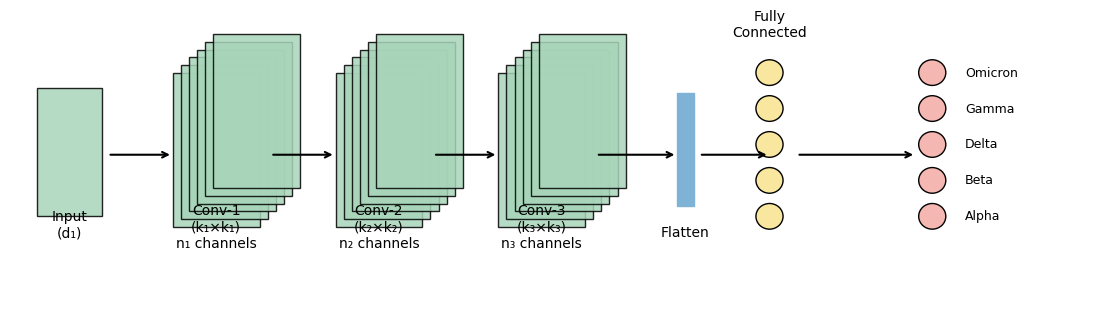

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_block(ax, xy, width, height, depth=5, label="", color="#A8D5BA"):
    """Draw stacked CNN feature maps"""
    x, y = xy
    for i in range(depth):
        rect = patches.Rectangle(
            (x + i*0.15, y + i*0.15),
            width, height,
            linewidth=1,
            edgecolor='black',
            facecolor=color,
            alpha=0.85
        )
        ax.add_patch(rect)
    ax.text(x + width/2, y - 0.4, label, ha='center', fontsize=10)

def draw_arrow(ax, start, end):
    ax.annotate(
        "", xy=end, xytext=start,
        arrowprops=dict(arrowstyle="->", linewidth=1.5)
    )

# Create figure
fig, ax = plt.subplots(figsize=(14, 4))
ax.set_xlim(0, 20)
ax.set_ylim(0, 6)
ax.axis('off')

# Input
draw_block(ax, (0.5, 2), 1.2, 2.5, depth=1, label="Input\n(d₁)")

# Conv Layer 1
draw_block(ax, (3, 1.8), 1.6, 3, depth=6, label="Conv-1\n(k₁×k₁)\nn₁ channels")

# Conv Layer 2
draw_block(ax, (6, 1.8), 1.6, 3, depth=6, label="Conv-2\n(k₂×k₂)\nn₂ channels")

# Conv Layer 3
draw_block(ax, (9, 1.8), 1.6, 3, depth=6, label="Conv-3\n(k₃×k₃)\nn₃ channels")

# Flatten
flatten = patches.Rectangle((12.3, 2.2), 0.3, 2.2, color="#7FB3D5")
ax.add_patch(flatten)
ax.text(12.45, 1.6, "Flatten", ha='center', fontsize=10)

# Fully Connected
fc_x = 14
for i in range(5):
    circ = plt.Circle((fc_x, 2 + i*0.7), 0.25, color="#F9E79F", ec="black")
    ax.add_patch(circ)

ax.text(fc_x, 5.5, "Fully\nConnected", ha='center', fontsize=10)

# Output
for i, label in enumerate(["Alpha", "Beta", "Delta", "Gamma", "Omicron"]):
    circ = plt.Circle((17, 2 + i*0.7), 0.25, color="#F5B7B1", ec="black")
    ax.add_patch(circ)
    ax.text(17.6, 2 + i*0.7, label, fontsize=9, va='center')

# Arrows
draw_arrow(ax, (1.8, 3.2), (3, 3.2))
draw_arrow(ax, (4.8, 3.2), (6, 3.2))
draw_arrow(ax, (7.8, 3.2), (9, 3.2))
draw_arrow(ax, (10.8, 3.2), (12.3, 3.2))
draw_arrow(ax, (12.7, 3.2), (14, 3.2))
draw_arrow(ax, (14.5, 3.2), (16.7, 3.2))

plt.show()

## Explain CNN Diagram Components

### Subtask:
Provide a detailed explanation of each component shown in the generated CNN architecture diagram, such as the Input, Embedding Layer, Convolutional Layers, Pooling Layers, Flattening, Fully Connected Layers, and Output, to clarify their roles in a typical CNN.


## Final Task

### Subtask:
Summarize the explanation of the CNN architecture diagram and confirm that the code is correct and well-understood.


## Summary:

### Q&A
The code for generating the CNN architecture diagram was executed successfully, and the diagram was displayed. The provided explanation of the CNN architecture diagram's components (Input, Embedding Layer, Convolutional Layers, Pooling Layers, Flatten, Fully Connected Layers, and Output) is comprehensive and correctly describes their roles.

### Data Analysis Key Findings
*   The provided Python code successfully executed, generating and displaying a conceptual diagram of the CNN architecture using Matplotlib, confirming its correctness.
*   The detailed explanation of each CNN component was already embedded in the task description, thoroughly covering the roles of the Input, Embedding Layer, Convolutional Layers (with filters and channels), Pooling Layers, Flatten layer, Fully Connected Layers, and Output layer.

### Insights or Next Steps
*   The current explanation and visualization provide a solid foundation for understanding CNN architecture, particularly for text classification tasks like fake news detection.
*   For a more complete understanding, future steps could involve demonstrating how these components are implemented in a deep learning framework (e.g., TensorFlow/Keras or PyTorch) and applying this architecture to a practical dataset.
